In [1]:
# print all the outputs in a cell
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

import sklearn as sk
from sklearn.ensemble import GradientBoostingRegressor

#import tensorflow as tf

In [2]:
#data starts from 05-01-2024. 

df = pd.read_excel('AAPL_Intraday_Data.xlsx')
df.head()



,Dates,Last Price,Bid Price,Ask Price,Bid-Ask Spread,Volume,Turnover
0,2024-05-01 09:30:00,170.000,169.94,170.05,0.11,704606.0,119685384.0
1,2024-05-01 09:31:00,169.770,169.98,170.05,0.07,194725.0,33083506.0
2,2024-05-01 09:32:00,169.620,169.98,170.07,0.09,110680.0,18798334.0
3,2024-05-01 09:33:00,169.350,169.98,170.07,0.09,203403.0,34494664.0
4,2024-05-01 09:34:00,169.115,170.00,169.80,-0.20,254573.0,43094548.0


In [3]:
#CHECK TO SEE IF THERE IS ANYTHING WRONG
#results show some NaT and NaN values
#should look into this when cleaning data
df.tail()

,Dates,Last Price,Bid Price,Ask Price,Bid-Ask Spread,Volume,Turnover
32090,NaT,NaN,NaN,207.27,207.27,NaN,NaN
32091,NaT,NaN,NaN,207.22,207.22,NaN,NaN
32092,NaT,NaN,NaN,207.22,207.22,NaN,NaN
32093,NaT,NaN,NaN,207.21,207.21,NaN,NaN
32094,NaT,NaN,NaN,207.30,207.30,NaN,NaN


In [4]:
#notice how the data type is datetime64 and float64
#all of them should be fine(?)
print(df.dtypes)

Dates             datetime64[ns]
Last Price               float64
Bid Price                float64
Ask Price                float64
Bid-Ask Spread           float64
Volume                   float64
Turnover                 float64
dtype: object


In [5]:
#change the name of the columns for easier access/read
df.columns = [
    'DATES',
    'PRICE',
    'BID',
    'ASK',
    'SPREAD',
    'VOLUME',
    'TURNOVER'
]

In [6]:
#ran this to check what the last entry's time was. it seems like its one hour after close which is interesting to note
dfex = df

In [7]:
dfex = dfex.dropna(subset = ['PRICE'])

In [8]:
dfex.tail()

,DATES,PRICE,BID,ASK,SPREAD,VOLUME,TURNOVER
14085,2024-06-21 15:56:00,207.795,191.30,190.84,-0.46,1063631.0,2.210122e+08
14086,2024-06-21 15:57:00,208.040,191.40,190.85,-0.55,1376674.0,2.859571e+08
14087,2024-06-21 15:58:00,208.020,191.30,190.84,-0.46,1463390.0,3.046166e+08
14088,2024-06-21 15:59:00,207.490,191.30,190.83,-0.47,106687072.0,2.213760e+10
14089,2024-06-21 16:29:00,207.490,191.32,190.83,-0.49,0.0,0.000000e+00


### Linear Regression
#### Y = what we are looking for. 
Looking for predicted price of AAPL for the next day

AAPL opened at $207.72 on 6/24/2024

In [9]:
#attempt with the implications of predicted stock price for each (run 7 models)

Y = df['PRICE']
X = df[['BID','ASK','SPREAD','VOLUME','TURNOVER']]

In [10]:
data = pd.concat([Y,X],axis=1)
data.describe()

,PRICE,BID,ASK,SPREAD,VOLUME,TURNOVER
count,14090.000000,31901.000000,32095.000000,32095.000000,1.409000e+04,1.409000e+04
mean,193.653786,193.765112,193.785265,1.191377,1.457984e+05,2.871314e+07
std,11.560946,11.441971,11.401349,16.165544,1.012050e+06,2.077106e+08
min,169.115000,169.100000,169.130000,-12.250000,0.000000e+00,0.000000e+00
25%,186.760000,186.720000,186.750000,-0.340000,4.763600e+04,9.034876e+06
50%,191.380000,191.260000,191.300000,0.030000,7.581550e+04,1.459399e+07
75%,196.010000,196.080000,196.030000,0.360000,1.310178e+05,2.558792e+07
max,220.058000,220.050000,220.080000,207.840000,1.066871e+08,2.213760e+10


In [11]:
#use mean of stocks to fill NaN values
# Fill NaN values with the mean of the column
data_clean = data.dropna(subset = ['PRICE'])

In [12]:
#this is showing me that I dropped more than half my data in the case where I drop NA values
#HOWEVER, there should be about 14000 data considering this is an accumulation of 36ish days of trading.
#making the dropna VALID!
data_clean.describe()

,PRICE,BID,ASK,SPREAD,VOLUME,TURNOVER
count,14090.000000,14090.000000,14090.000000,14090.000000,1.409000e+04,1.409000e+04
mean,193.653786,185.129803,185.162511,0.032708,1.457984e+05,2.871314e+07
std,11.560946,5.791221,5.777881,0.393016,1.012050e+06,2.077106e+08
min,169.115000,169.100000,169.130000,-2.620000,0.000000e+00,0.000000e+00
25%,186.760000,182.550000,182.600000,-0.110000,4.763600e+04,9.034876e+06
50%,191.380000,185.200000,185.140000,0.040000,7.581550e+04,1.459399e+07
75%,196.010000,189.940000,189.970000,0.170000,1.310178e+05,2.558792e+07
max,220.058000,192.750000,192.760000,6.180000,1.066871e+08,2.213760e+10


In [13]:
#reassign X and Y to the new columns with no NaNs

Y = data_clean['PRICE']
X = data_clean[['BID','ASK','SPREAD','VOLUME','TURNOVER']]

In [14]:
data_clean.tail()

,PRICE,BID,ASK,SPREAD,VOLUME,TURNOVER
14085,207.795,191.30,190.84,-0.46,1063631.0,2.210122e+08
14086,208.040,191.40,190.85,-0.55,1376674.0,2.859571e+08
14087,208.020,191.30,190.84,-0.46,1463390.0,3.046166e+08
14088,207.490,191.30,190.83,-0.47,106687072.0,2.213760e+10
14089,207.490,191.32,190.83,-0.49,0.0,0.000000e+00


In [17]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, Y, random_state=42)

In [24]:
boost = GradientBoostingRegressor(learning_rate = 0.1, random_state=42)
boost.fit(X_train, y_train)

GradientBoostingRegressor(random_state=42)

In [25]:
print("Accuracy on training set: {:.3f}".format(boost.score(X_train, y_train)))
print("Accuracy on test set: {:.3f}".format(boost.score(X_test, y_test)))

Accuracy on training set: 0.947
Accuracy on test set: 0.937


In [26]:
y_pred = boost.predict(X_test)
y_pred.shape

(3523,)

In [27]:
def plot_feature_importances_AAPL(model):
    n_features = X.shape[1]
    plt.barh(np.arange(n_features), model.feature_importances_, align='center')
    plt.yticks(np.arange(n_features), X.columns)
    plt.xlabel("Feature importance")
    plt.ylabel("Feature")
    plt.ylim(-1, n_features)

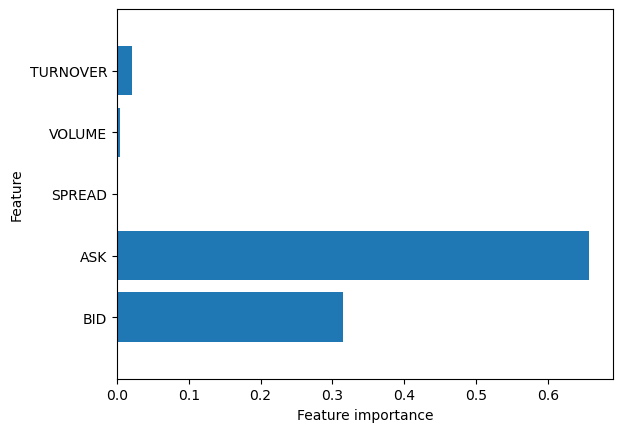

In [28]:
plot_feature_importances_AAPL(boost)

In [29]:
#test on the 6/20/24 for 12:59:00 PST
single_instance_df = pd.DataFrame([[191.32,190.83,-0.49,106687072.0,22137600000]],columns = X.columns)
prediction = boost.predict(single_instance_df)
print(prediction)

[212.35967421]




### Comparing what the model predicted vs. actual price:

#### 208.28 vs. 209.68

##### VERY CLOSE RESULTS O_O